In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from tqdm import tqdm_notebook
import string
from collections import Counter
import itertools
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report
import pickle
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from nltk.tokenize import RegexpTokenizer
tqdm.pandas()
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
## pip install swifter #for parallelization
import swifter
from nltk import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [14]:
ca_restaurant_reviews=pd.read_csv("california_restaurants.csv")
ca_restaurant_reviews=ca_restaurant_reviews.reset_index(drop = True)

In [15]:
df=ca_restaurant_reviews[['text','review_stars']]

In [13]:
df

NameError: name 'df' is not defined

In [27]:
def tokenize(x):
 tokenizer = RegexpTokenizer(r'\w+')
 return tokenizer.tokenize(x)

def stemmer(x):
 stemmer = PorterStemmer()
 return ' '.join([stemmer.stem(word) for word in x])

def lemmatize(x):
 lemmatizer = WordNetLemmatizer()
 return ' '.join([lemmatizer.lemmatize(word) for word in x])

In [30]:
df['tokens'] = df['text'].map(tokenize)

c:\Users\Rajup\anaconda3\envs\testinggrounds\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
def stemmer(x):
 stemmer = PorterStemmer()
 return ' '.join([stemmer.stem(word) for word in x])

def lemmatize(x):
 lemmatizer = WordNetLemmatizer()
 return ' '.join([lemmatizer.lemmatize(word) for word in x])

In [31]:
df['lemma'] = df['tokens'].map(lemmatize)
df['stems'] = df['tokens'].map(stemmer)

c:\Users\Rajup\anaconda3\envs\testinggrounds\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\Rajup\anaconda3\envs\testinggrounds\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
df.to_csv("preprocessed.csv")

### Re

In [2]:
df=pd.read_csv("preprocessed.csv")

In [3]:
X = df['lemma']
y = df['review_stars']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 13)

In [6]:
X_test

93637     Great location Decent spa service but pool ser...
122700    Ok not everything is perfect but ALMOST I had ...
131060    This is a great spot If you are coming in on a...
130742    crab cake and the seafood gumbo are definitely...
96459     Great staff Great bartender Kitchen wa not goo...
                                ...                        
39548     Elegant restaurant with excellent service We m...
71212     We ate at Bibi Ji last Friday night The place ...
16739     terrible terrible terrible if at all possible ...
68602     This place is my absolute favorite Pizza place...
195166    Really disappointed with my experience at this...
Name: lemma, Length: 51366, dtype: object

In [24]:
pipe_mnnb = Pipeline(steps = [('tf', TfidfVectorizer()), ('mnnb', MultinomialNB())])

In [26]:
pgrid_mnnb = {
 'tf__max_features' : [1000, 2000, 3000],
 'tf__stop_words' : ['english', None],
 'tf__ngram_range' : [(1,1),(1,2)],
 'tf__use_idf' : [True, False],
 'mnnb__alpha' : [0.1, 0.5, 1]
}

In [28]:
gs_mnnb = GridSearchCV(pipe_mnnb,pgrid_mnnb,cv=5,n_jobs=-1)

In [29]:
gs_mnnb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                       ('mnnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'mnnb__alpha': [0.1, 0.5, 1],
                         'tf__max_features': [1000, 2000, 3000],
                         'tf__ngram_range': [(1, 1), (1, 2)],
                         'tf__stop_words': ['english', None],
                         'tf__use_idf': [True, False]})

In [30]:
gs_mnnb.best_params_

{'mnnb__alpha': 0.1,
 'tf__max_features': 3000,
 'tf__ngram_range': (1, 2),
 'tf__stop_words': None,
 'tf__use_idf': True}

In [72]:
import joblib
joblib.dump(gs_mnnb.best_estimator_, 'gridsearchcv.pkl')

['gridsearchcv.pkl']

In [31]:
preds_mnnb = gs_mnnb.predict(X)

In [32]:
df['preds'] = preds_mnnb

c:\Users\Rajup\anaconda3\envs\testinggrounds\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
from sklearn.metrics import confusion_matrix

In [35]:
preds_mnnb_test = gs_mnnb.predict(X_test)

In [36]:
conf_mnnb = confusion_matrix(y_test, preds_mnnb_test)


In [37]:
conf_mnnb

array([[ 3491,   391,   275,   159,   695],
       [ 1283,   588,   815,   597,   667],
       [  593,   225,  1192,  1935,  1327],
       [  194,    42,   270,  3498,  7502],
       [  178,     8,    32,  1179, 24230]], dtype=int64)

In [40]:
gs_mnnb.score(X_train, y_train)

gs_mnnb.score(X_test, y_test)

0.6424288439824009

In [41]:
type(X_test)

pandas.core.series.Series

In [63]:
sample_text=["This is nothing but a waste of money, I will never return, only saving is that this is a clean restaurant"]
sample_text[0]
sample_text_tokens = tokenize(sample_text[0])
sample_text_tokens

In [67]:
lemma=lemmatize(sample_text_tokens)
testing=[]
testing.append(lemma)

In [69]:
prediction=gs_mnnb.predict(testing)[0]
prediction

### Inference

In [3]:
import joblib
model = joblib.load('gridsearchcv.pkl')

In [22]:
#### wrapping up all the preprocessing functions to streamline the inference
def inference(x):
    x = x.map(tokenize)
    x = lemmatize(x)
    x = [x]
    predictions=model.predict(x)[0]
    return model.predict(x)[0]

In [48]:
predictions=model.predict(X_test)
predictions

In [54]:
y_true=y_test.to_list()
y_true=np.array(y_true)
y_true

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_true, predictions,model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

In [66]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.61      0.70      0.65      5011
           2       0.47      0.15      0.23      3950
           3       0.46      0.23      0.30      5272
           4       0.47      0.30      0.37     11506
           5       0.70      0.95      0.81     25627

    accuracy                           0.64     51366
   macro avg       0.54      0.46      0.47     51366
weighted avg       0.60      0.64      0.60     51366



<AxesSubplot:>

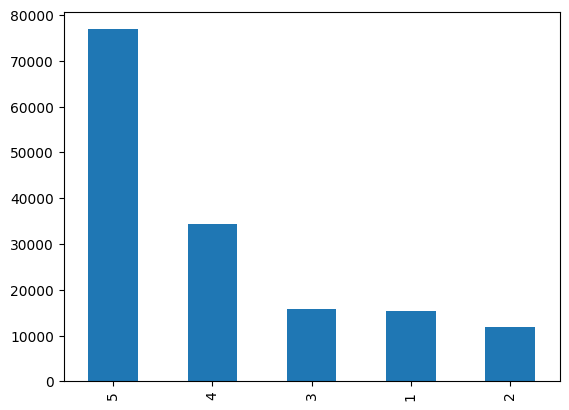

In [70]:
y_train.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Type'>

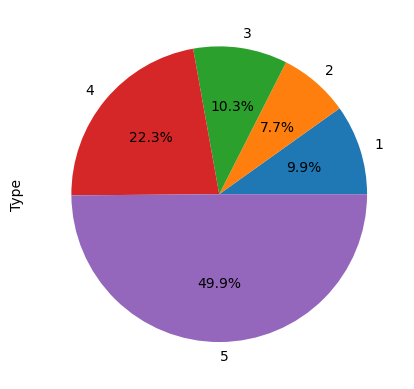

In [74]:
df.groupby("review_stars").size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [73]:
y_train

205425    4
92592     1
32547     5
61315     5
164464    5
         ..
167866    5
25324     4
65689     4
164706    5
178352    5
Name: review_stars, Length: 154098, dtype: int64

In [76]:
count = y_train.value_counts()

In [86]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
ros = RandomOverSampler(random_state=777)
X_try=X.tolist()
X_try=np.array(X_try)

In [91]:
X_try=X_try.reshape(-1,1)

In [92]:

X_ROS, y_ROS = ros.fit_resample(X_try, y)
X_train, x_test, Y_train, y_test = train_test_split(X_ROS,y_ROS,test_size=0.3,random_state=42)


In [94]:
count = Y_train.value_counts()

<AxesSubplot:>

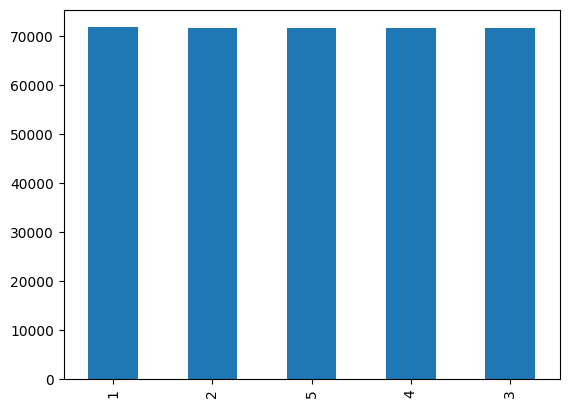

In [99]:
Y_train.value_counts().plot(kind='bar')

In [101]:
from imblearn.under_sampling import RandomUnderSampler

In [112]:

undersample = RandomUnderSampler(sampling_strategy='all')

In [113]:
X_train_try=X_train.to_list()
X_train_try=np.array(X_train_try)
X_train_try=X_train_try.reshape(-1,1)

In [114]:
X_train_under, y_train_under = undersample.fit_resample(X_train_try, y_train)

In [115]:
X_train_under.shape

(59000, 1)

<AxesSubplot:>

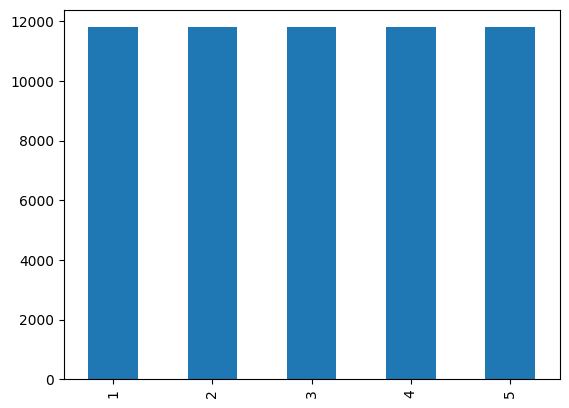

In [116]:
y_train_under.value_counts().plot(kind='bar')